<a href="https://colab.research.google.com/github/Karthikreddy2299/Karthikreddy_Data690/blob/main/assignment_05/Assignment_05_Part_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05: Part 03

Name: Karthik Reddy

Date: 03/05/2022


## Part 1: everything is a cell

Jupyter Notebooks are organized as a set of "cells". Each cell can contain different types of content: like Python code (or R, Julia, etc), images or even human readable text. 
Empty cells are left below: 

Jupyter notebooks are optimized for an efficient workflow. There are many keyboard shortcuts that will let you interact with your documents, run code and make other changes; mastering these shortcuts will speed up your work. For example, there are two shortcuts to execute a cell:

1. shift + return: Run cell and advance to the next one.
2. ctrl  + return: Run the cell but don't change focus.

In [3]:
17+17

34

## Part 2: Working with code

Importing numpy and matplotlib:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

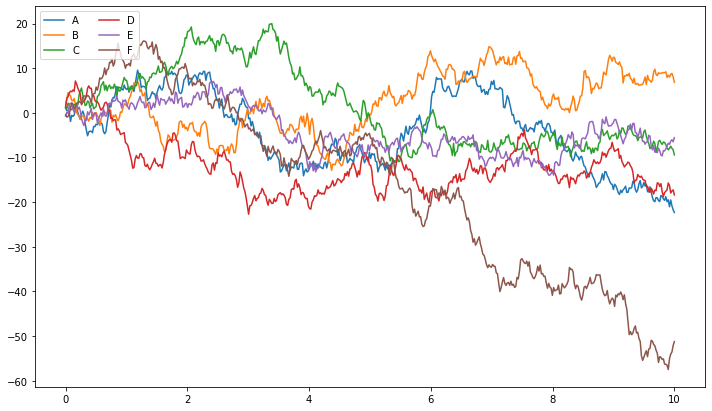

In [6]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Part 3: Interacting with data

In [7]:
import requests
import pandas as pd

In [8]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [9]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-27 00:56:03.221513')

In [10]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [11]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

## Bitcoin:

In [12]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-27 01:00:00,39146.66,39285.02,38741.67,38836.10,45.843886,1.785093e+06
2022-02-27 02:00:00,38813.10,38880.04,38233.95,38233.95,60.561839,2.330766e+06
2022-02-27 03:00:00,38246.62,38593.29,38218.11,38572.65,15.473687,5.940543e+05
2022-02-27 04:00:00,38568.58,38714.84,38557.26,38637.49,18.114466,7.001259e+05
2022-02-27 05:00:00,38637.15,38694.83,38500.56,38593.13,10.271630,3.965473e+05


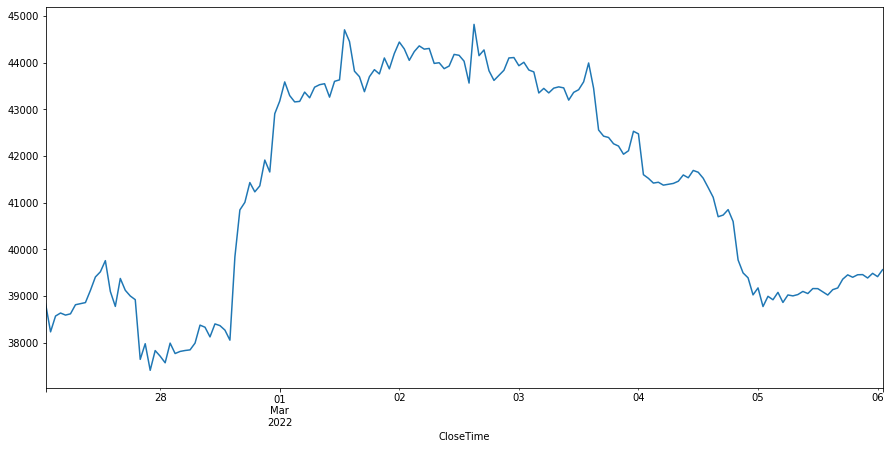

In [13]:
btc['ClosePrice'].plot(figsize=(15, 7))

## Etherium: 

In [14]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-27 01:00:00,2779.16,2791.41,2743.57,2752.57,156.051381,4.306093e+05
2022-02-27 02:00:00,2748.41,2753.56,2683.18,2683.18,700.680329,1.902612e+06
2022-02-27 03:00:00,2681.25,2714.60,2678.04,2712.10,153.019514,4.123667e+05
2022-02-27 04:00:00,2711.26,2729.59,2711.26,2720.40,276.287461,7.512221e+05
2022-02-27 05:00:00,2714.18,2721.75,2703.00,2707.97,82.094881,2.226362e+05


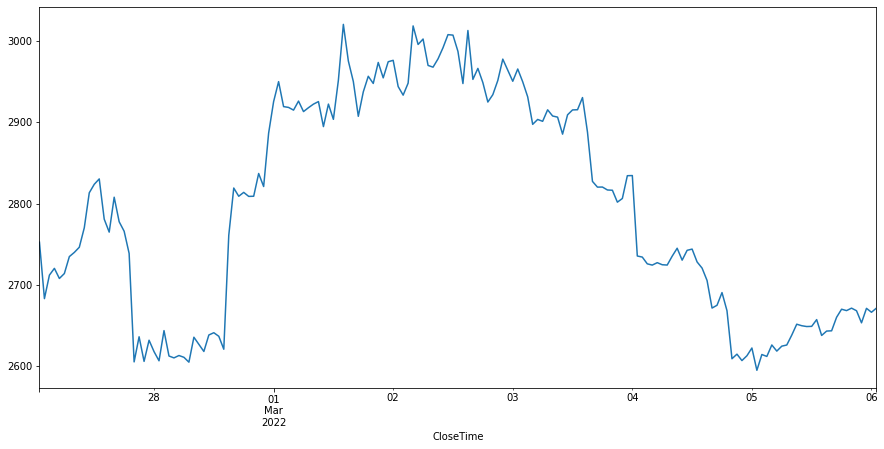

In [15]:
eth['ClosePrice'].plot(figsize=(15, 7))

## Dynamic plots with Bokeh

In [16]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [17]:
output_notebook()

In [18]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

## Exporting to Excel

In [19]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [20]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [21]:
eth.to_excel(writer, sheet_name='Ether')

In [22]:
writer.save()